In [1]:
from kitaev import *
from tqdm import tqdm
from scipy.misc import derivative as dif
from scipy.integrate import quad
plt.style.use(["default",'seaborn-v0_8-poster','normal_font.mplstyle'])
from math import floor, ceil

In [2]:
var_mu = [3,6.5]
var_T = np.linspace(0.2, 5, 2000)
var_Delta = np.linspace(0,3,50)
var_k = torch.linspace(-np.pi,np.pi,2000,device=device)
zero_gaps = []
pi_gaps = []

for i in tqdm(range(len(var_mu))):
    t=1
    N_global = 50
    d_global = 2
    mu1 = 0* t 
    mu2 = var_mu[i] * t 
    delta1 = 1 * t 
    delta2 = 1 * t 
    t1 = 1 * t 
    t2 = 1 * t
    h_1 = Hamiltonian(d=d_global, N=N_global, u=onsite(_mu=mu1), v=offsite(_delta=delta1, _t=t1))
    h_2 = Hamiltonian(d=d_global, N=N_global, u=onsite(_mu=mu2), v=offsite(_delta=delta2, _t=t2))
    hamiltonians_k = [h_1.k_space_hamiltonian, h_2.k_space_hamiltonian]
    zero_gap = []
    pi_gap = []

    for j in range(len(var_T)):


        energies = np.abs(calculate_bands(momenta=var_k,hamiltonians_k=hamiltonians_k,T=var_T[j]))
        g1 = np.min(energies)
        g2 = np.pi - np.max(energies)
        zero_gap.append(g1)
        pi_gap.append(g2)

    
    zero_gaps.append(zero_gap)
    pi_gaps.append(pi_gap)


zero_gaps = np.array(zero_gaps)
pi_gaps = np.array(pi_gaps)

100%|██████████| 2/2 [00:21<00:00, 10.81s/it]


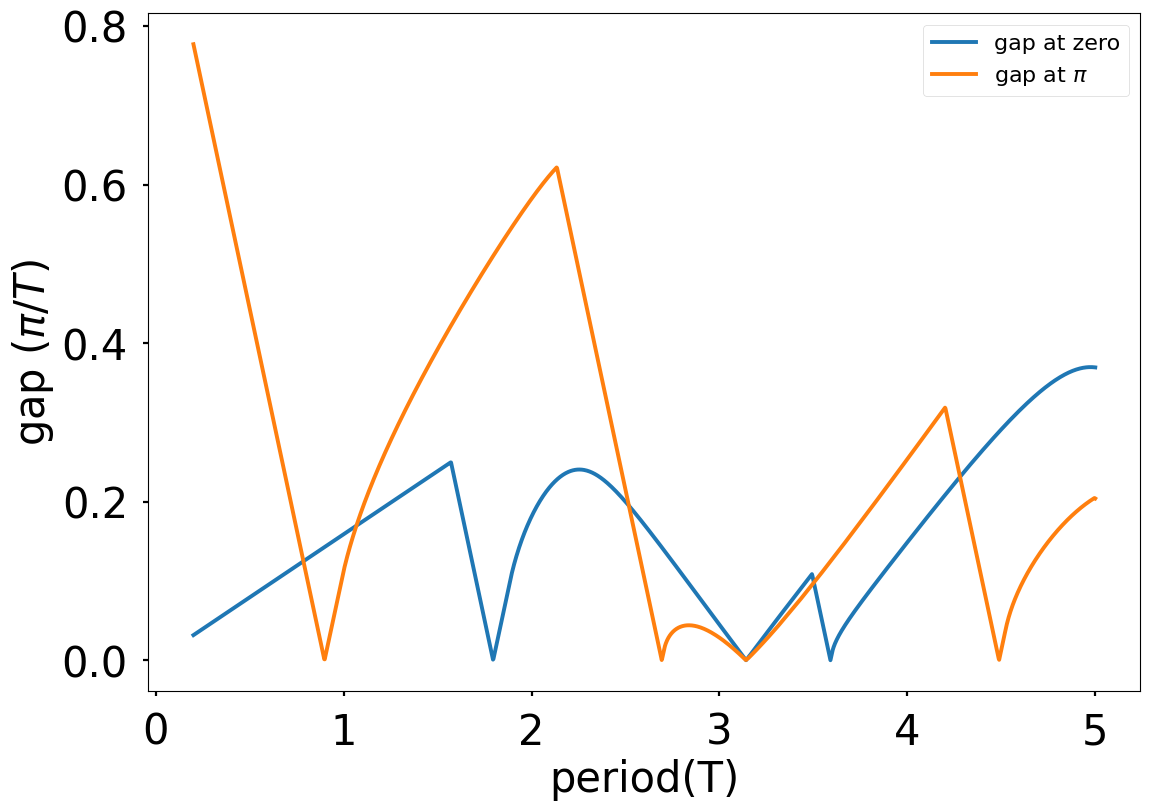

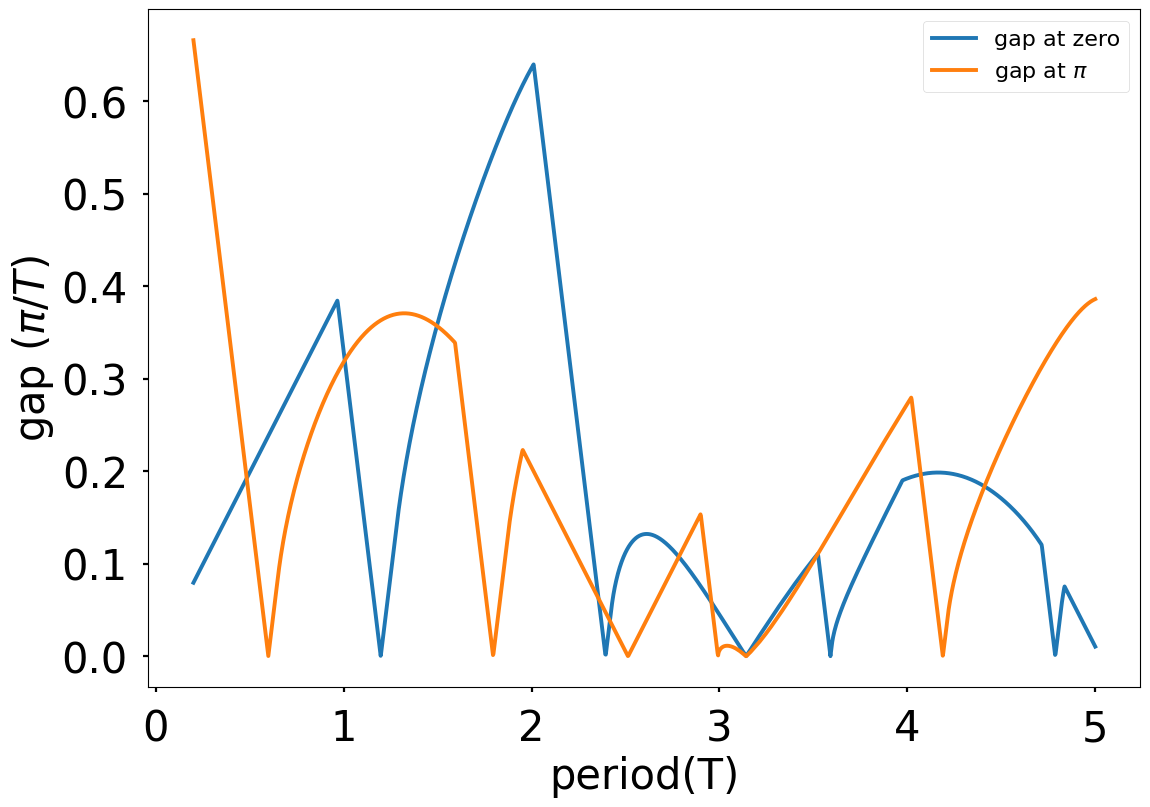

In [3]:
for i in range(len(var_mu)):
    plt.title(f"")
    plt.plot(var_T,zero_gaps[i]/np.pi, label = 'gap at zero')
    plt.plot(var_T,pi_gaps[i]/np.pi, label = 'gap at $\pi$')
    plt.ylabel('gap ($\pi/T$)')
    plt.xlabel('period(T)')
    #plt.yscale('log')
    plt.legend()
    plt.savefig(f'./graphs/bulk gap-mu1=0t mu2={var_mu[i]}t delta1=delta2=t.pdf', bbox_inches = 'tight')
    plt.show()
